In [1]:
import non_dim_lderiv_control as ld
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stable_baselines3 import PPO

In [2]:
lmin = 0.95
lmax = 1.05
phi_0 = np.pi / 4
phidot_0 = 0
tau = 0.001
ldot_max = 0.1
power_max = 0.100
rtol = 0.001

In [3]:
power_bounded = power_max < 1
env = ld.Swing(power_bounded=power_bounded)
env.ldot_max = ldot_max
env.lmin = lmin
env.lmax = lmax
env.ldot_max = ldot_max
env.phi_0 = phi_0
env.phidot_0 = phidot_0
env.tau = tau
env.power_max = power_max
env.rtol = rtol
env.pump_limit = 2e6

/Users/iandavenport/opt/anaconda3/lib/python3.7/site-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float32
  "Box bound precision lowered by casting to {}".format(self.dtype)


In [4]:
model = PPO.load(
    "bounded_final_trained_w_energy_ratio/model_w_energy/rl_model_1000000_steps.zip",
    env=env,
)

/Users/iandavenport/opt/anaconda3/lib/python3.7/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: Can't get attribute '_make_function' on <module 'cloudpickle.cloudpickle' from '/Users/iandavenport/opt/anaconda3/lib/python3.7/site-packages/cloudpickle/cloudpickle.py'>
  f"Could not deserialize object {data_key}. "
/Users/iandavenport/opt/anaconda3/lib/python3.7/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: Can't get attribute '_make_function' on <module 'cloudpickle.cloudpickle' from '/Users/iandavenport/opt/anaconda3/lib/python3.7/site-packages/cloudpickle/cloudpickle.py'>
  f"Could not deserialize object {data_key}. "


In [5]:
done = False
obs = env.reset()
env.L = [env.lmax]
while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, _ = env.step(action.item())

phi_hist = np.array(env.phi)
l_hist = np.array(env.L)

x_t = l_hist * np.sin(phi_hist)
y_t = -l_hist * np.cos(phi_hist)
ref_x = np.array(env.lmax) * np.sin(env.phi)
ref_y = -np.array(env.lmax) * np.cos(env.phi)

Text(0.5, 1.0, 'Angle over time')

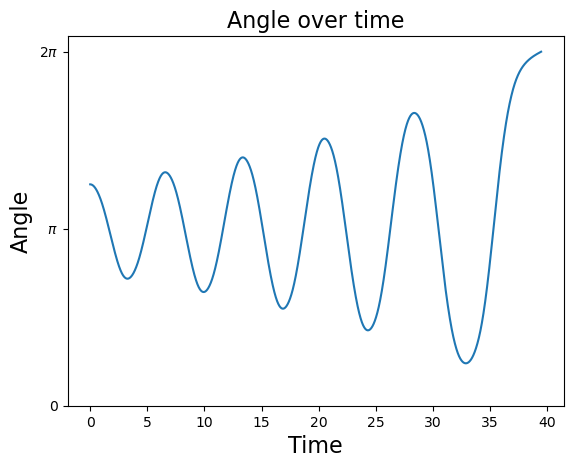

In [6]:
fontdict = {"fontsize": 16}
plt.plot(
    env.tau * np.arange(len(env.phi)), np.mod(np.array(env.phi) + np.pi, 2 * np.pi)
)
plt.yticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"2$\pi$"])
plt.xlabel("Time", fontdict=fontdict)
plt.ylabel("Angle", fontdict=fontdict)
plt.title("Angle over time", fontdict=fontdict)
# plt.savefig("theta.png")

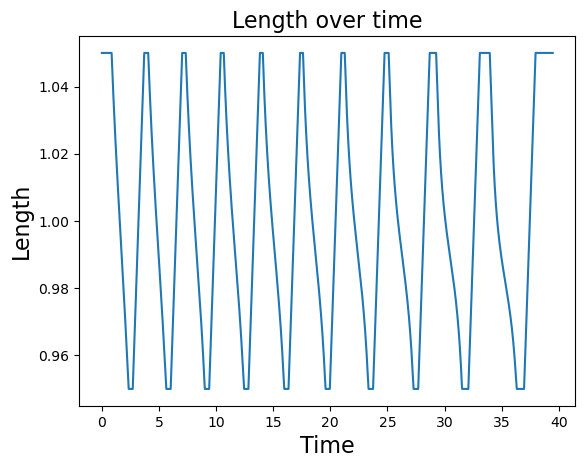

In [7]:
plt.plot(env.tau * np.arange(len(env.phi)), env.L)
plt.xlabel("Time", fontdict=fontdict)
plt.ylabel("Length", fontdict=fontdict)
plt.title("Length over time", fontdict=fontdict)
# plt.savefig("length.png")
plt.show()

Text(0.5, 1.0, 'Lengths and Angles over time')

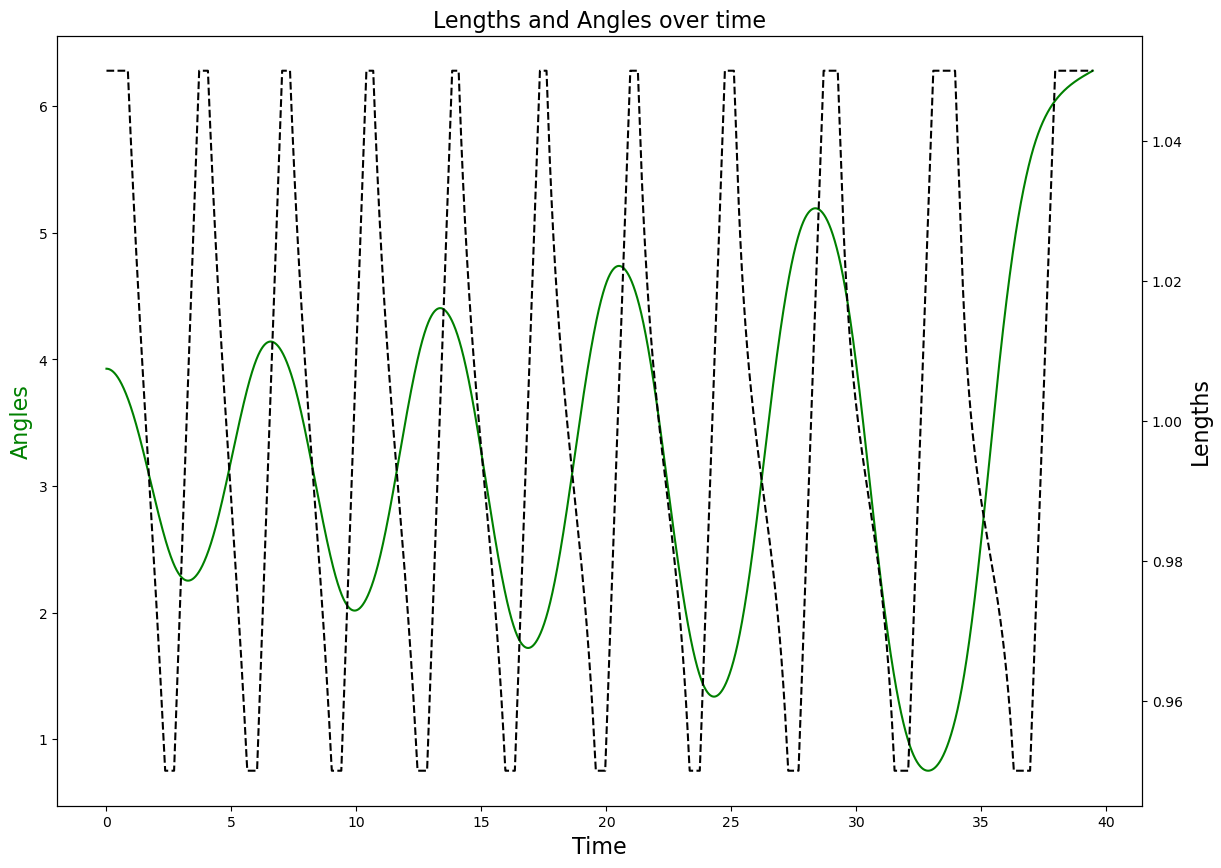

In [8]:
fig, ax1 = plt.subplots(figsize=(14, 10))

ax2 = ax1.twinx()
ax1.plot(
    env.tau * np.arange(len(env.phi)),
    np.mod(np.array(env.phi) + np.pi, 2 * np.pi),
    "g-",
)
ax2.plot(env.tau * np.arange(len(env.phi)), env.L, "k--")

ax1.set_xlabel("Time", fontsize=16)
ax1.set_ylabel("Angles", color="g", fontsize=16)
ax2.set_ylabel("Lengths", color="k", fontsize=16)

plt.title("Lengths and Angles over time", fontsize=16)
# plt.savefig("overlay.png")

In [9]:
t = env.tau * np.arange(len(env.phi))  # [:-1]
phi = np.mod(np.array(env.phi) + np.pi, 2 * np.pi)  # [:-1]
l_dot_hist_t = env.tau * np.arange(len(env.Ldot_hist))  # [:-1]
l_dot_hist = env.Ldot_hist  # [:-1]
# smooth_angle = savgol_filter(phi, 9, 2)

Text(0.5, 1.0, 'Control and Angle over time')

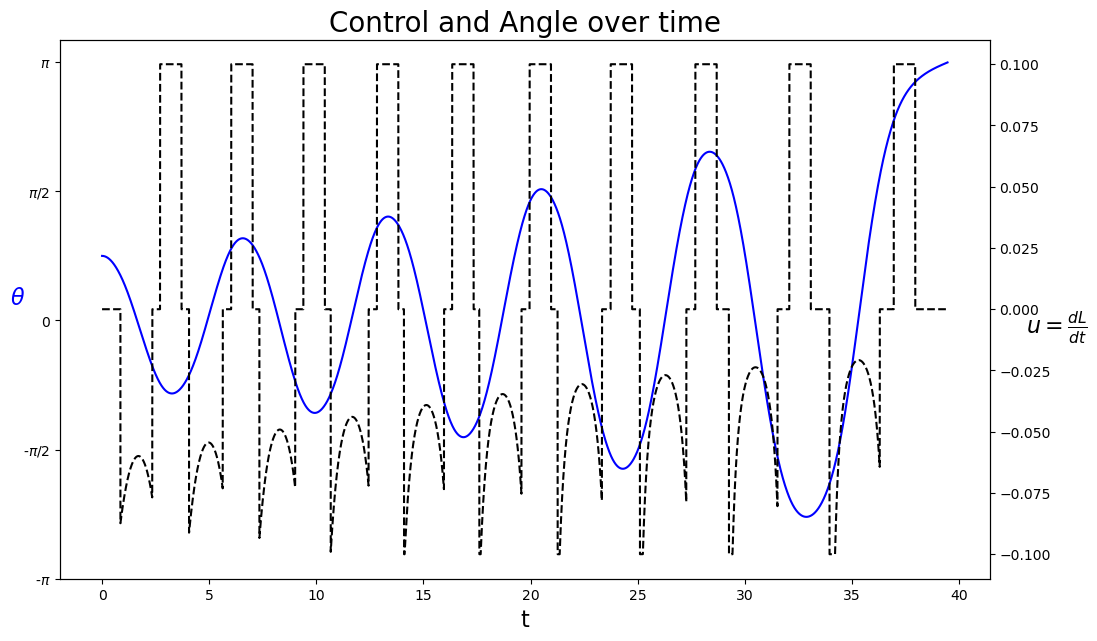

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 7))

ax2 = ax1.twinx()
ax1.plot(t[:], phi[:] - np.pi, "b")
ax2.plot(l_dot_hist_t, l_dot_hist, "k--")

ax1.set_xlabel("t", fontsize=16)
ax1.set_ylabel(r"$\theta$", fontsize=16, color="b", rotation=0)
ax1.set_yticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
ax1.set_yticklabels([r"-$\pi$", "-$\pi/2$", "0", "$\pi/2$", r"$\pi$"])
ax2.set_ylabel(r"$u = \frac{dL}{dt}$", color="k", fontsize=16, rotation=0)

plt.title("Control and Angle over time", fontsize=20)
# plt.show()
# plt.savefig("control_overlay.png")

In [ ]:
# control_dict = {"time": l_dot_hist_t, "control": l_dot_hist}
# angle_dict = {"time": t, "angle": phi - np.pi}

In [ ]:
control_angle_dict = {"time": l_dot_hist_t, "control": l_dot_hist, "angle": phi - np.pi}
control_angle_df = pd.DataFrame(control_angle_dict)

In [ ]:
# ang_df = pd.DataFrame(angle_dict)
# ctrl_df = pd.DataFrame(control_dict)

In [ ]:
control_angle_df.to_csv("bounded_control_angle.csv")

In [11]:
env.tau * env.pumps

39.462